In [ ]:
import pylab as plb
%pylab inline
import numpy as np
import copy as cp

import matplotlib.pyplot as plt 
#from ode_rats import rats
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def der_rats(y,t):
    return 0.01*y*(1 + np.sin(2.0*math.pi/365.0*t))

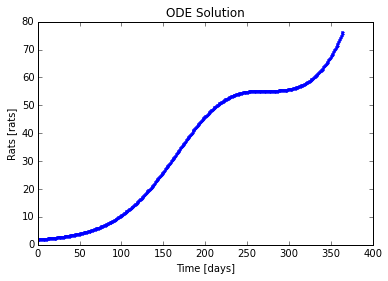

In [ ]:
# Initial conditions
y0 = 2.0
# Time gride for integrat/ion
tt = np.linspace(0, 364, 365)
# Solve the ODE
yy = odeint(der_rats, y0, tt)
plt.figure(1)
plt.plot(tt,yy, '.' )
plt.xlabel( "Time [days]" )
plt.ylabel( "Rats [rats]" )
plt.title ("ODE Solution")
plt.show()

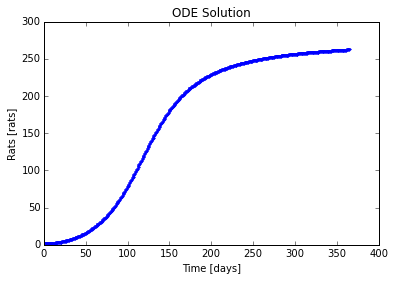

In [ ]:
from scipy.integrate import ode # Initial conditions
y0 = 2.0
# Time gride for integration
t0 = 0.0
tF = 364
num_steps = 365
tt = np.linspace(t0, tF, num_steps)
# Setup list to hold solution
yy = []
yy.append(y0)
# Setup the solver
solver = ode(der_rats)
solver.set_integrator('dopri5') # Use Runge−Kutta 4/5 algorithm 
solver.set_initial_value(y0,t0) # Initial conditions: time and value
# Integrate
for t in tt[1:]:
    yy.append(solver.integrate(t))
    if not solver.successful():
        print('WARNING:Itegration not successful!')
plt.figure (1)
plt.plot(tt,yy,".")
plt.xlabel("Time [days]")
plt.ylabel("Rats [rats]")
plt.title ("ODE Solution")
plt.show()

# Test 3D reconstruction

[TOC]

In [ ]:
#3D Lorenz
def Lder(x,t,p):
    der0 = p['s']*(x[1] - x[0])
    der1 = x[0]*(p['r']-x[2]) - x[1]
    der2 = x[0]*x[1] - p['b']*x[2]
    return [der0,der1,der2]

Lpar= dict(s= 10., b =8./3, r = 28)

#random variation of parameters
def randpar(par,var):
    '''This function adds gaussian noise to parameters stored in a dictionary. 
    var is the std of the gaussian distribution (1 = 100% of the not noisy value).'''
    flag = 0
    while flag == 0:
        temp = cp.deepcopy(par)
        for key in par.keys():
            temp[key]=par[key]*(1+var*plb.randn())
            #if temp[key] < 0:
            #    flag = 0
            #    break
            #else:
                #flag =1
            if temp[key] < 0:
                temp[key] = 0
        flag = 1            
    return temp  

In [ ]:
# for fixed Delta t solve 300 trajectories
def traj_solve(N,dt,mod,mod_par,var):
    t0 = 0
    tend = 1
    Nt = (tend-t0)/float(dt)
    time = np.linspace(t0,tend,Nt)
    
    traj = np.full((N,len(time),3),-3.)
    for i in range(N):
        # add noise to the position of the fixed point
        rlvpar = randpar(mod_par,var)
        # sample randomly from both basins of attraction
        yinit = (plb.rand(3)-[0.5,0.5,0])*[40,60,50]
        traj[i,:,:] = odeint(mod,yinit,time,args = (rlvpar,))
    return traj,time    

# for fixed Delta t solve 
def traj_solve_mod(N,dt,tend,mod,mod_par,var):
    t0 = 0
    Nt = (tend-t0)/float(dt)
    time = np.linspace(t0,tend,Nt)
    
    traj = np.full((N,len(time),3),-3.)
    for i in range(N):
        # add noise to the position of the fixed point
        rlvpar = randpar(mod_par,var)
        # sample randomly from both basins of attraction
        yinit = (plb.rand(3)-[0.5,0.5,0])*[40,60,50]
        traj[i,:,:] = odeint(mod,yinit,time,args = (rlvpar,))
    return traj,time 

In [ ]:
#convert discrete index to x1,x2 position in the model

#continuous scaling
#0 -> -21
#31 -> 21
def ind_to_x(i):
    return i*42./31. -21
#0 -> -29
#31 -> 29
def ind_to_y(i):
    return i*58/31. -29

#0 -> 0
#31 -> 30
def ind_to_z(i):
    return i*52/31. -2.



In [ ]:
# convert x position to discrete index

#-21 -> 0
#21 -> 31
def x_to_ind(x):
    ind = x*31./42. +31./2.
    return int(round(ind)) 
#-29 -> 0
#29 -> 31
def y_to_ind(x):
    ind = x*31./58. +31./2.
    return int(round(ind)) 
#0 -> 0
#30 -> 31
def z_to_ind(x):
    ind = x*31./52.+31./26.
    return int(round(ind))

In [ ]:
recfile = np.load("3drec_b.npz")
rfile = np.load("3dmeas_b.npz")
Rec0 = recfile['arr_0']
Rec1 = recfile['arr_1']
Rec2 = recfile['arr_2']
FM_0 = rfile['arr_0']
FM_1 = rfile['arr_1']
FM_2 = rfile['arr_2']

In [ ]:
Rec0.shape

(32, 32, 32)

In [ ]:
#Ref0 = reshape(f_ref[0],(32,32,32),order= "C")
#Ref1 = reshape(f_ref[1],(32,32,32),order= "C")
#Ref2 = reshape(f_ref[2],(32,32,32),order= "C")
FM0 = reshape(FM_0,(32,32,32),order='C')
FM1 = reshape(FM_1,(32,32,32),order='C')
FM2 = reshape(FM_2,(32,32,32),order='C')

In [ ]:
f_r = np.full((3,32,32,32),0.)
for i in range(32):
    for j in range(32):
        for k in range(32):
            f_r[0,i,j,k] = Lder([ind_to_x(i),ind_to_y(j),ind_to_z(k)],1,Lpar)[0]
            f_r[1,i,j,k] = Lder([ind_to_x(i),ind_to_y(j),ind_to_z(k)],1,Lpar)[1]
            f_r[2,i,j,k] = Lder([ind_to_x(i),ind_to_y(j),ind_to_z(k)],1,Lpar)[2]

In [ ]:
#test ODE
def Lrecder(x,t):
    i = x_to_ind(x[0])
    j = y_to_ind(x[1])
    k = z_to_ind(x[2])
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:
        der0 = Rec0[i,j,k]
    else:
        print('here')
        der0 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der1 = Rec1[i,j,k]
    else:
        print('here')
        der1 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der2 = Rec2[i,j,k]
    else:
        print('here')
        der2 = 0.
    return array([der0,der1,der2])

def Lrecder_N(t,x):
    i = x_to_ind(x[0])
    j = y_to_ind(x[1])
    k = z_to_ind(x[2])
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:
        der0 = Rec0[i,j,k]
    else:
        print('here')
        der0 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der1 = Rec1[i,j,k]
    else:
        print('here')
        der1 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der2 = Rec2[i,j,k]
    else:
        print('here')
        der2 = 0.
    return array([der0,der1,der2])

def Lmeasder(x,t):
    i = x_to_ind(x[0])
    j = y_to_ind(x[1])
    k = z_to_ind(x[2])    
    if i >= 0 and i < 32:
        der0 = FM0[i,j,k]
    else:
        der0 = 0.
    if j >= 0 and j < 32:   
        der1 = FM1[i,j,k]
    else:
        der1 = 0.
    if k >= 0 and k < 32:   
        der2 = FM2[i,j,k]
    else:
        der2 = 0.
    return array([der0,der1,der2])

def Lrefder(x,t):
    i = x_to_ind(x[0])
    j = y_to_ind(x[1])
    k = z_to_ind(x[2])    
    
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:
        der0 = f_r[0,i,j,k]
    else:
        der0 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der1 = f_r[1,i,j,k]
    else:
        der1 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der2 = f_r[2,i,j,k]
    else:
        der2 = 0.    
    return array([der0,der1,der2])

def Lrefder_N(t,x):
    i = x_to_ind(x[0])
    j = y_to_ind(x[1])
    k = z_to_ind(x[2])    
    
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:
        der0 = f_r[0,i,j,k]
    else:
        der0 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der1 = f_r[1,i,j,k]
    else:
        der1 = 0.
    if i >= 0 and i < 32 and j >= 0 and j < 32 and k >= 0 and k < 32:   
        der2 = f_r[2,i,j,k]
    else:
        der2 = 0.    
    return array([der0,der1,der2])

In [ ]:
# find trajectories that stay in between (0,2)x(0,2)
traj,time = traj_solve_mod(1000,0.01,1.,Lder,Lpar,0.0)

l = []
for i in range(1000):
    ind00 = x_to_ind(np.min(traj[i,:,0]))
    ind01 = x_to_ind(np.max(traj[i,:,0]))
    ind10 = y_to_ind(np.min(traj[i,:,1]))
    ind11 = y_to_ind(np.max(traj[i,:,1]))
    ind20 = z_to_ind(np.min(traj[i,:,2]))
    ind21 = z_to_ind(np.max(traj[i,:,2]))
    if ind00 > 5 and ind01 < 25 and ind10 > 5 and ind11 <25 and ind20 < 25 and ind21 > 5 :
        l.append(i)

print(len(l))    

99


In [ ]:
# solve in original and recontructed function
t0 = 0
tend = 1.
dt = 0.01
Nt = (tend-t0)/float(dt)
time = np.linspace(t0,tend,Nt)
n = 10
trajor = np.full((n,len(time),3),np.nan)
trajrec = np.full((n,len(time),3),np.nan)
trajref = np.full((n,len(time),3),np.nan)
var = 0.

for i in range(10):
    print(i)
    yinit = traj[l[i],0,:]
    #trajor[i,:,:] = odeint(Lder,yinit,time,args = (Lpar,), rtol=1e-10, atol=1e-12)
    trajrec[i,:,:] = odeint(Lrecder,yinit,time,printmessg=True, rtol=1e-10, atol=1e-12)
    trajref[i,:,:] = odeint(Lrefder,yinit,time, rtol=1e-10, atol=1e-12)

0
1

//anaconda/envs/py3/lib/python3.4/site-packages/scipy/integrate/odepack.py:156: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
//anaconda/envs/py3/lib/python3.4/site-packages/scipy/integrate/odepack.py:159: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)



2
3
4
5
6
7
8
9


//anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
//anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


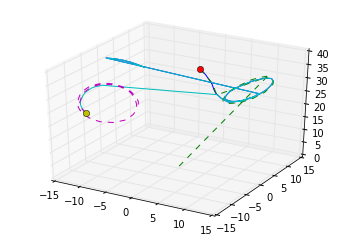

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in [7,8]:
    ax.plot(trajrec[i,:,0], trajrec[i,:,1], trajrec[i,:,2],'')
    ax.plot(trajref[i,:,0], trajref[i,:,1], trajref[i,:,2],'--')
    ax.plot([trajrec[i,0,0]], [trajrec[i,0,1]], [trajrec[i,0,2]],'o')
#fixed point 1    
#ax.plot([sqrt(Lpar['b']*(Lpar['r']-1))],[sqrt(Lpar['b']*(Lpar['r']-1))],[Lpar['r']-1],'o')    
#fixed point 2
#ax.plot([-sqrt(Lpar['b']*(Lpar['r']-1))],[-sqrt(Lpar['b']*(Lpar['r']-1))],[Lpar['r']-1],'o')    
#fixed point 3
#ax.plot([0],[0],[0],'o')   
#ax.set_xlim3d(-21, 21)
#ax.set_ylim3d(-29,29)
#ax.set_zlim3d(-2,50)
ax.legend()
plt.show()

(-50, 50)

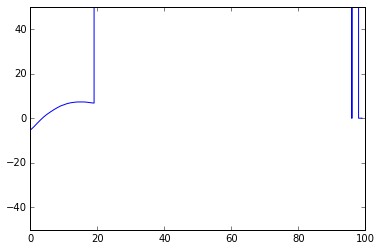

In [ ]:
plot(trajrec[9,:,0])
ylim(-50,50)

In [ ]:
l[9]

119

array([ -5.28175523,  14.38157855,  39.79764703])

In [ ]:
y0 = traj[l[3],0,:]

# Time gride for integration
t0 = 0.0
tF = 5.0
num_steps = 1000
tt = np.linspace(t0, tF, num_steps)
# Setup list to hold solution
yy_rec = []
yy_rec.append(y0)
yy_ref = []
yy_ref.append(y0)
# Setup the solver
solver_rec = ode(Lrecder_N)
solver_rec.set_integrator('dopri5') # Use Runge−Kutta 4/5 algorithm 
solver_rec.set_initial_value(y0,t0) # Initial conditions: time and value

solver_ref = ode(Lrefder_N)
solver_ref.set_integrator('dopri5') # Use Runge−Kutta 4/5 algorithm 
solver_ref.set_initial_value(y0,t0) # Initial conditions: time and value
# Integrate
for t in tt[1:]:
    yy_rec.append(solver_rec.integrate(t))
    if not solver_rec.successful():
        print('WARNING:Itegration rec not successful!')
    yy_ref.append(solver_ref.integrate(t))
    if not solver_rec.successful():
        print('WARNING:Itegration not successful!')    
#plt.figure (1)
#plt.plot(tt,yy,".")
#plt.plot(time[:20],trajrec[9,:20,0])
#plt.xlabel("Time [days]")
#plt.ylabel("Rats [rats]")
#plt.title ("ODE Solution")
#plt.show()

//anaconda/envs/py3/lib/python3.4/site-packages/scipy/integrate/_ode.py:1018: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


In [ ]:
tr_rec = np.full((len(yy_rec),3),0.)
tr_ref = np.full((len(yy_ref),3),0.)
for i in range(len(yy_rec)):
    tr_rec[i,:] = yy_rec[i]
    tr_ref[i,:] = yy_ref[i]    

//anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
//anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


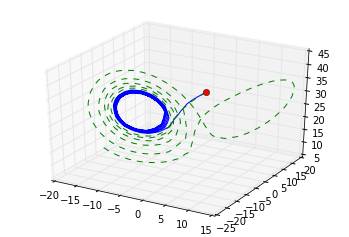

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in [0]:
    ax.plot(tr_rec[:,0], tr_rec[:,1], tr_rec[:,2])
    ax.plot(tr_ref[:,0], tr_ref[:,1], tr_ref[:,2],'--')
    ax.plot([tr_rec[0,0]], [tr_rec[0,1]], [tr_rec[0,2]],'o')
#fixed point 1    
#ax.plot([sqrt(Lpar['b']*(Lpar['r']-1))],[sqrt(Lpar['b']*(Lpar['r']-1))],[Lpar['r']-1],'o')    
#fixed point 2
#ax.plot([-sqrt(Lpar['b']*(Lpar['r']-1))],[-sqrt(Lpar['b']*(Lpar['r']-1))],[Lpar['r']-1],'o')    
#fixed point 3
#ax.plot([0],[0],[0],'o')   
#ax.set_xlim3d(-21, 21)
#ax.set_ylim3d(-29,29)
#ax.set_zlim3d(-2,50)
ax.legend()
plt.show()